<center><h1>Linear Discriminants: logistic regression</h1></center>

$\newcommand{\x}{\mathbf{x}}\newcommand{\w}{\mathbf{w}}\newcommand{\c}{\mathcal{C}}\newcommand{\wx}{\w^\top\x}$


|  Information  |  Your answer  |
|-----------|:---------------------------------|
| **Group** | *BM36* |
| **Name 1** | *Thibault Douzon* |
| **Name 2** | *Rajavarman Mathivanan* |


# Some background

As we have seen in the lecture, the logistic regression models the probability of a class label $\c$ given a datapoint $p(\c|\x)$ as:
$$p(\c|\x) = \sigma(\w^\top\x) = \frac{1}{1+e^{-\w^\top\x}}$$

In this lab, we shall implement this model.

## Logistic function

First, let us set things up; import the libraries we will need and define a function to plot heatmaps, to be used later.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # Set the size of future plots

import time
from IPython import display

xx,yy = np.mgrid[-5:10:.1,-5:10:.2]
def plotHeat(w):
    """ 
    Plot a weight vector w = [w_0,w_1,w_2] as a colour map
    """
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = sigma(w.dot(np.array([1., xx[i,j], yy[i,j]])))
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5,10])
    plt.ylim([-5,10])    
    plt.scatter(d[:,0],d[:,1],20,colours)
    plt.show()
    time.sleep(.01)


To get started, let us plot the logistic function $\sigma(a)$ in the range $[-5\dots 5]$ in blue, and its derivative $\frac{\partial}{\partial a} \sigma(a)$ in green. 

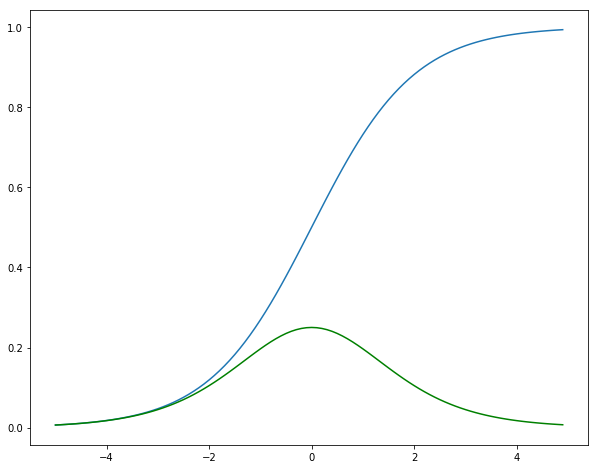

In [5]:
x = np.arange(-5,5,.1)
def sigma(a):
    return 1./(1.+np.exp(-a))

plt.plot(x,sigma(x))
plt.plot(x,sigma(x)*(1-sigma(x)),'g')

## Training data

Next, load the data in the provided data file "*data-2class.npz*", and plot it. Then also plot the discriminant of a logistic regression model with parameters $\w = [ 0,1,1]$.


$\frac{1}{1+e^{-\w^\top\x}} = 1/2$, so $\exp \w^\top \x = 1$ or $\w^\top\x = 0$. In other words, we can plot 
$w_0+w_1x_1 + w_2x_2 = 0$, or $x_1 = -\frac{w_2x_2+w_0}{w_1}$

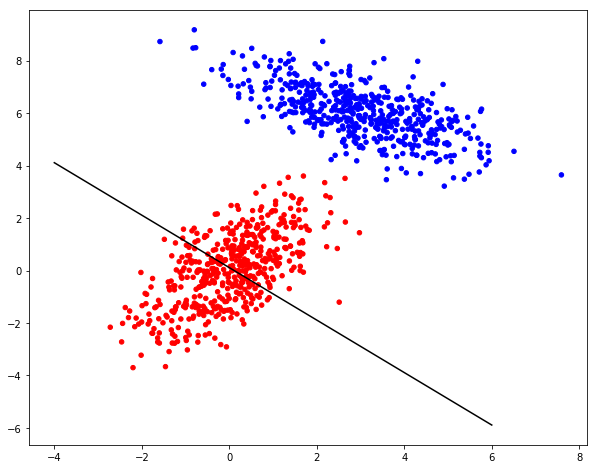

In [11]:
data = np.load("data-2class.npz")
d = data['d']
l = data['l']

colours = [ [ 'r', 'b' ][int(x)] for x in np.nditer(l)]
plt.scatter(d[:,0],d[:,1],20,colours)

def plotDisc(w):
    if abs(w[1])>abs(w[2]):
        yr = np.arange(-6,10,1)
        xr = -(w[2]*yr+w[0])/w[1]
        valid  = (xr>-4) & (xr<10)
        plt.plot(xr[valid], yr[valid],'k')
    else:
        xr = np.arange(-4,10,1)
        yr = -(w[1]*xr+w[0])/w[2]
        valid  = (yr>-6) & (yr<10)
        plt.plot(xr[valid], yr[valid],'k')

plotDisc(w+[0.1, 0.1, 0.1])


## Probability of the given labels for all datapoints

We will now train our logistic regression model on a training dataset. This dataset contains a number of datapoints $\x_1,\dots,\x_N$belonging to two classes and, for each datapoint $\x_n$, the corresponding class label $l_n$. The training is done by *maximum likelihood*, that is, we maximise the probability of the data given the model. 

## Model

Before we start coding, let's have a closer look at the model. Our labels are $0$ or $1$, representing the two classes. If a datapoint $\x_n$ belongs to class $\c_n=1$, the probability $p(\c_n=1|\x_n) = \sigma(\w^\top\x_n)$ and the probability $p(\c_n=0|\x_n) = 1-\sigma(\w^\top\x)$. We now want the probability of the labels given the data, for the complete training set: $p(\c_1,\dots,\c_N|\x_1,\dots,\x_N)$. Remember that the probability of the union of two independent events is $p(a,b)=p(a)\,p(b)$. Using the fact that the labels are $0$ and $1$ (and that $x^0=1$ and $x^1=x$, we can then write this as 
$$p(\c_1\dots\c_n|\x_1\dots\x_n,\w) = \prod_{n=1}^N \sigma(\w^\top\x_n)^{\c_n}\,(1-\sigma(\w^\top\x_n))^{1-\c_n}$$

**Question 1 [5 Marks]:** For the provided dataset, compute this probability when the model weights are $\w = [ 0,-1,-1]$. Is the computed answer what you expected? Is it exactly correct?
Think about how you could find the maximum of this function. What does the gradient of this probability look like (that is, if I changed the value of $\w$ a little bit, how would the probability change?

In [10]:
"""probability is:  [0.]

The probability is too small to be represented as a "float" 
(double-precision real value), and is approximated as being 
zero by the computer. This is a problem, because it means 
that the computer cannot compute the gradient: changing w does
not change the probability (as computed by the computer)"""
#ANSQ1

# Your answer comes here :-)
def likelyhood(w, x_l, c_l):
    likelyhood_r = 1
    for x, c in zip(x_l, c_l):
        x = np.concatenate(([1],x))
        likelyhood_r *= np.power(sigma(w.dot(x)), c)*np.power(1-sigma(w.dot(x)), 1-c)
    return likelyhood_r

w = np.array([0,-1,-1])

lh = likelyhood(w, d, l)
lh2 = likelyhood(w+[0.1, 0.1, 0.1], d, l)

print('Likelyhood = {} | {}'.format(lh, lh2))
print("""The likelyhood is near 0. Actually it should not be exactly 0 but the precision of the 
computer number system (double) is not enough to make the difference. It is a problem because the computer
won't make the difference between to points near each others as the gradient is (very close to) null too.""")
#/ANSQ1

Likelyhood = [0.] | [0.]
The likelyhood is near 0. Actually it should not be exactly 0 but the precision of the 
computer number system (double) is not enough to make the difference. It is a problem because the computer
won't make the difference between to points near each others as the gradient is (very close to) null too.


Dealing with the joint probability is complicated, as 1) its value can become very small, easily too small for a computer to represent it accurately, and 2) taking the gradient of this joint probability with respect to $\w$ makes the contribution of every datapoint to the gradient depend on every other datapoint's value.

# Gradient

So instead, we will define an error function which is the natural logarithm of the likelihood.

**Question 2 [5 marks]:** Write down the equation for the error function $E(\w)$ as a function of the parameters, which is defined as $E(\w) \triangleq -\log p(\c_1,\dots,\c_N|\x_1,\dots,\x_N)$, the probability of all the labels given all the datapoints, in analytical form. Remember that the datapoints are assumed to be independent and identically distributed (i.i.d.), so that the probability of one label given the corresponding datapoint is independent of the rest of the data.



*Answer to Q2*

\begin{align}
E(\w)
&= -\log \prod_{n=1}^N \sigma(\w^\top\x_n)^{\c_n}\,(1-\sigma(\w^\top\x_n))^{1-\c_n}\\
&= -\sum_n \c_n\log \frac{1}{1+e^{-\wx}} + (1-\c_n) \log (1-\frac{1}{1+e^{-\wx}}) \\
&= \sum_n \c_n \log (1+e^{-\wx}) - (1-\c_n) \log \frac{1+e^{-\wx}-1}{1+e^{-\wx}} \\
&= \sum_n \c_n \log (1+e^{-\wx}) - (1-\c_n) (-\wx - \log(1+e^{-\wx})) \\ 
&= \sum_n \c_n \log (1+e^{-\wx}) + \wx + \log(1+e^{-\wx}) - \c_n\wx - \c_n \log(1+e^{-\wx}) \\
&= \sum_n (1-\c_n)\wx + \log(1+e^{-\wx})
\end{align}


**Question 3 [5 marks]:** Compute the actual value of the error function for the given dataset and weight $w=[0,-1,-1]$.

Notice that this function does not contain products of probabilities anymore, but sums of log-probabilities, thus making the derivative of the joint log-probability with respect of each of the weights a sum of derivatives of the probabilities of single datapoints. The logarithm is what's called a "monotonically increasing function", which means that if $x_1 > x_2$ then $f(x_1) > f(x_2)$. Because of that, the value of $\w$ for which $p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is maximal is also the value of $\w$ for which $\log p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is maximal and thus $-\log p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is minimal.

The gradient of $\nabla_\w E(\w)$ is given by $\nabla_\w E(\w) = \sum_{n=1}^N \left(\sigma( \w^\top\x_n)-c_n\right)\x_n$. You can verify for yourself that that is the case; it is a good exercise and will confirm that your answer to question 2 was correct ;-).



In [15]:
"""5056.861918563063"""
#ANSQ3

def log1pe(x):
    """log(1+e^x)"""
    return np.log1p(np.exp(x))
    # return 0 if x<-40. else x if x>40 else np.log(1.+np.exp(x))

# Your answer to Q3

def error_likelyhood(w, x_l, c_l): # x_l [x0, x1, x2 ... xn]
    error_r = 0
    for x, c in zip(x_l, c_l):
        x = np.concatenate(([1], x))
        error_r += (1-c)*w.dot(x) + log1pe(-w.dot(x))
    return error_r

w = np.array([0,-1,-1]) # [0,-1,-1]
error = error_likelyhood(w, d, l)

print('Error = {}'.format(error))

#/ANSQ3

Error = [5056.86191856]


**Question 4 [30 marks]:** Implement gradient descent, updating the weights as $\w^{\mathrm{new}} = \w^{\mathrm{old}} - \eta \nabla_\w E(\w)$. The value of $\eta$ will affect how fast the algorithm converges and is really up to you. In this case, I suggest you use $\eta=10^{-3}$, which is quite small but allows you to see what's happening. This is a form of batch gradient descent.

Protip: use the "plotheat" function defined above to plot what the classifier looks like at each iteration. This will allow you to visualise how the optimisation is doing.

Wall time: 11.8 s


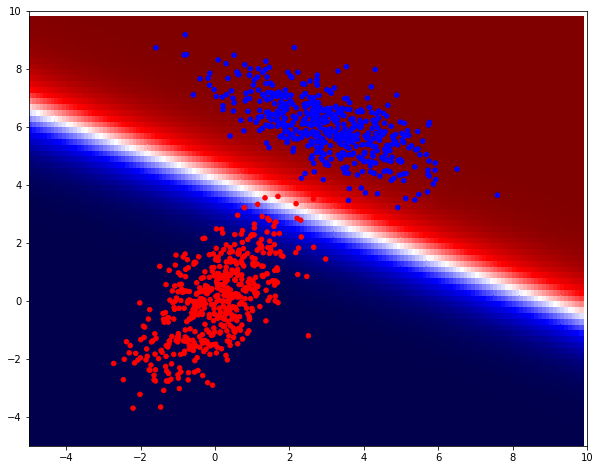

n = 295
Delta = 0.0009988691251152642
Error = [20.68229971]
w = [-6.30884328  0.72542079  1.53057569]


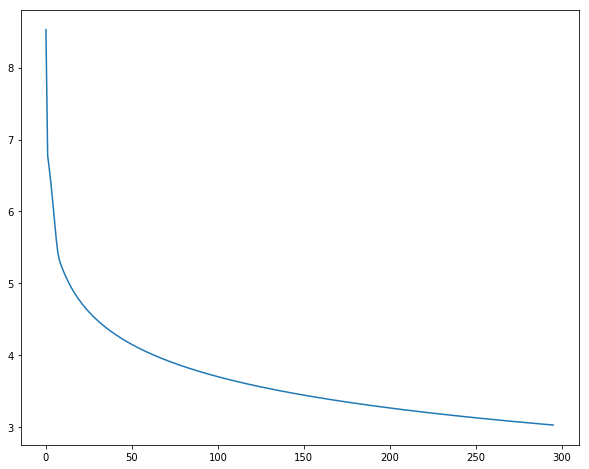

In [72]:
#ANSQ4

def gradient(w, x_l, c_l):
    gradient_r = 0
    for x, c in zip(x_l, c_l):
        x = np.concatenate(([1], x))
        gradient_r += (sigma(w.dot(x)) - c)*x
    return gradient_r

def batch():
    eta = 10**-3
    w_old = np.array([0,-1,-1])
    delta = float('inf')
    eps = 10**-3
    N = 10**3
    n = 0

    error_l = [error_likelyhood(w_old, d, l)]

    while n < N and delta > eps:
        w_new = w_old - eta*gradient(w_old, d, l)
        # plotHeat(w_new)

        delta = np.linalg.norm(w_new - w_old)/np.linalg.norm(w_old) #  error_likelyhood(w_new, d, l)

        error_l += [error_likelyhood(w_new, d, l)]

        # update w
        w_old = w_new
        n += 1
    return delta, w_new, error_l, n
    
%time delta, w_new, error_l, n = batch()
plotHeat(w_new)

print('n = {}'.format(n), 'Delta = {}'.format(delta), 'Error = {}'.format(error_l[-1]), 'w = {}'.format(w_new), sep='\n')
plt.plot(np.log(error_l))
plt.show()

#/ANSQ4


# Stochastic gradient descent

**Question 5 [20 marks]:** As a last question, implement stochastic gradient descent and compare it to batch gradient descent.

Wall time: 14.1 s


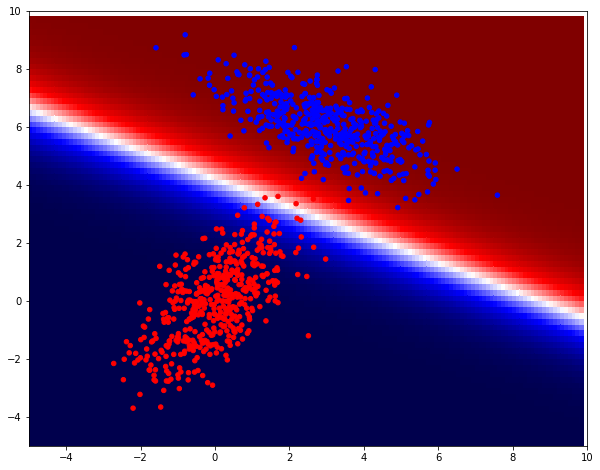

n = 300000
Error = [20.64710247]
w = [-6.31480517  0.74113771  1.53721381]


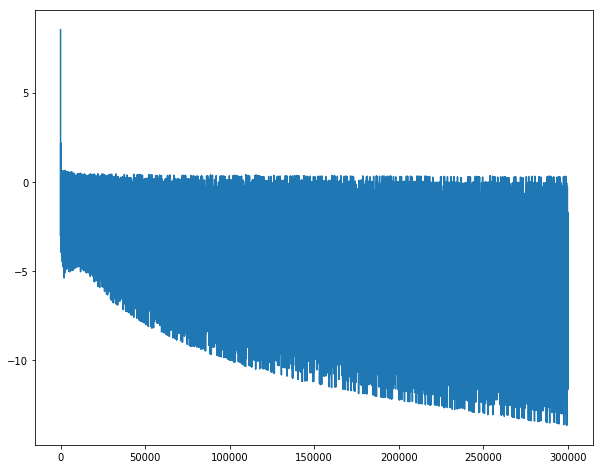

For the same amount of iterations, a stochastic model is worse than a batch model, but it runs faster. 
When we use N iterations in the batch version and N*size(data) in the stochastic, the results are almost the same, 
but the stochastic model is slower (1.5x).
When we give both model the same computation time, the resulting model from the batch algorithm is a bit better than the



In [77]:
#ANSQ5

def stochastic():
    import itertools
    import random

    eta = 10**-3
    w_old = np.array([0,-1,-1])

    N = 300 * len(d)#2.5*10**5 # approx same time as batch version
    n = 0

    error_l = [error_likelyhood(w_old, d, l)]


    data = list(zip(d,l))

    while n < N:

        curr_d, curr_l = random.choice(data)
        curr_d, curr_l = [curr_d], [curr_l]
        w_new = w_old - eta*gradient(w_old, curr_d, curr_l)

        #delta = error_likelyhood(w_new, d, l) #np.linalg.norm(w_new - w_old)/np.linalg.norm(w_old)

        error_l += [error_likelyhood(w_new, curr_d, curr_l)]

        # update w
        w_old = w_new
        n += 1
    
    return w_new, error_l, n
    
%time w_new, error_l, n = stochastic()

plotHeat(w_new)

print('n = {}'.format(n), 'Error = {}'.format(error_likelyhood(w_new, d, l)), 'w = {}'.format(w_new), sep='\n')
plt.plot(np.log(error_l))
plt.show()


print("""For the same amount of iterations, a stochastic model is worse than a batch model, but it runs faster. 
When we use N iterations in the batch version and N*size(data) in the stochastic, the results are almost the same, 
but the stochastic model is slower (1.5x).
When we give both model the same computation time, the resulting model from the batch algorithm is a bit better than the
stochastic one.

A stochastic algorithm is usefull when the dataset gets bigger because then the time of each iteration remains independant 
of the size of the dataset whereas in the batch version, each iteration takes O(size(data))

""")
#/ANSQ5
